# Duplicate values in dataset

In [1]:
import sanity_checks_methods
import pandas as pd
import ML_algorithms

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.drop_null_values(df)

In [2]:
num_features = df.shape[1]
num_data_points = df.shape[0]

print("Number of features in the dataset: ", num_features)
print("Number of data in dataset: ", num_data_points)

Number of features in the dataset:  11
Number of data in dataset:  9999


## Duplicate value with choice feature

In [3]:
print('COUNT DUPLICATES BEFORE INSERTING DUPLICATE VALUES')
print('-------------------------')
sanity_checks_methods.print_duplicates_values(df)

df = sanity_checks_methods.add_duplicates_values(df, 'avg_glucose_level', 10)
print("\nAdd duplicates values")

print('\nCOUNT DUPLICATES AFTER INSERTING DUPLICATE VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)


COUNT DUPLICATES BEFORE INSERTING DUPLICATE VALUES
-------------------------
9999

Duplicate Counts:
0

Percentage of Duplicate Values:
0.0

Add duplicates values

COUNT DUPLICATES AFTER INSERTING DUPLICATE VALUES
-------------------------
10002
Null Value Counts:
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Duplicate Counts:
3

Percentage of Duplicate Values:
0.029994001199760045

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature: age
Null Count:

Inserting 10% duplicate values in bmi feature

In [4]:
print('COUNT DUPLICATES BEFORE INSERTING DUPLICATE VALUES')
print('-------------------------')
sanity_checks_methods.print_duplicates_values(df)

df = sanity_checks_methods.add_duplicates_values(df, 'bmi', 10)
print("\nAdd duplicates values")

print('\nCOUNT DUPLICATES AFTER INSERTING DUPLICATE VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)

COUNT DUPLICATES BEFORE INSERTING DUPLICATE VALUES
-------------------------
10002

Duplicate Counts:
3

Percentage of Duplicate Values:
0.029994001199760045

Add duplicates values

COUNT DUPLICATES AFTER INSERTING DUPLICATE VALUES
-------------------------
10003
Null Value Counts:
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Duplicate Counts:
4

Percentage of Duplicate Values:
0.039988003598920324

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Featur

Inserting 10% duplicate values in 'sex' feature

In [5]:
print('COUNT DUPLICATES BEFORE INSERTING DUPLICATE VALUES')
print('-------------------------')
sanity_checks_methods.print_duplicates_values(df)

df = sanity_checks_methods.add_duplicates_values(df, 'sex', 10)
print("\nAdd duplicates values")


print('\nCOUNT DUPLICATES AFTER INSERTING DUPLICATE VALUES')
print('-------------------------')
sanity_checks_methods.print_null_duplicates_values(df)


COUNT DUPLICATES BEFORE INSERTING DUPLICATE VALUES
-------------------------
10003

Duplicate Counts:
4

Percentage of Duplicate Values:
0.039988003598920324

Add duplicates values

COUNT DUPLICATES AFTER INSERTING DUPLICATE VALUES
-------------------------
10553
Null Value Counts:
sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Percentage of Null Values:
sex                  0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

Duplicate Counts:
554

Percentage of Duplicate Values:
5.24969203070217

Feature: sex
Null Count: 0
Null Percentage: 0.00%

Feature:

### Decision Tree


Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3864
           1       0.98      1.00      0.99      3523

    accuracy                           0.99      7387
   macro avg       0.99      0.99      0.99      7387
weighted avg       0.99      0.99      0.99      7387


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1686
           1       0.95      1.00      0.97      1480

    accuracy                           0.97      3166
   macro avg       0.97      0.97      0.97      3166
weighted avg       0.97      0.97      0.97      3166


Migliori Parametri: {'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}
Tempo impiegato per la Ricerca degli Iperparametri: 31.88102626800537 secondi
Tempo impiegato per l'Addestramento: 0.060204267501831055 secondi
Nod

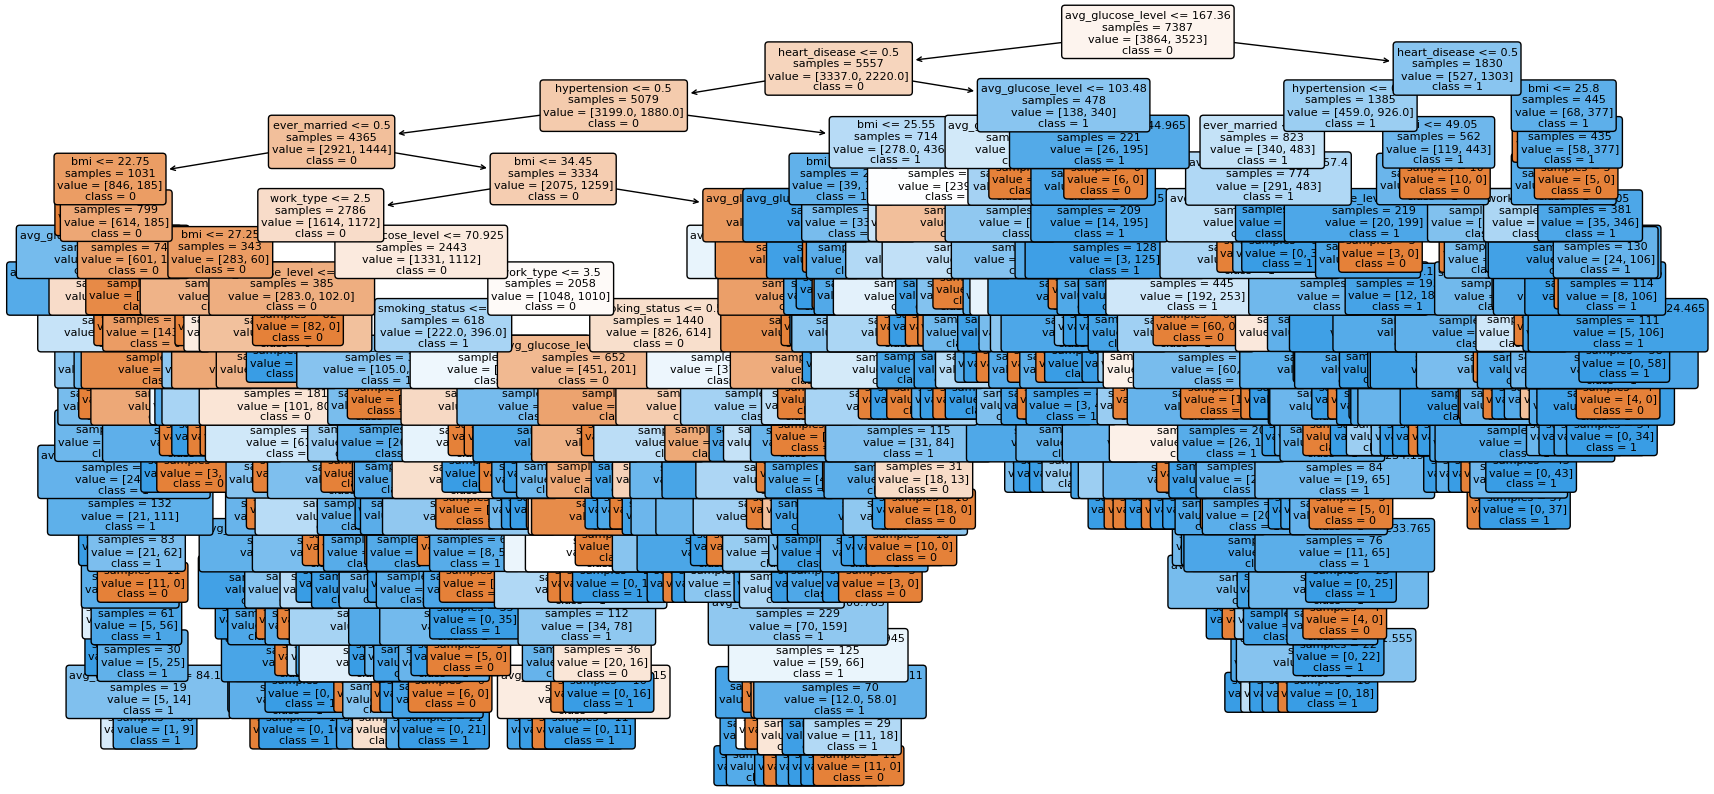

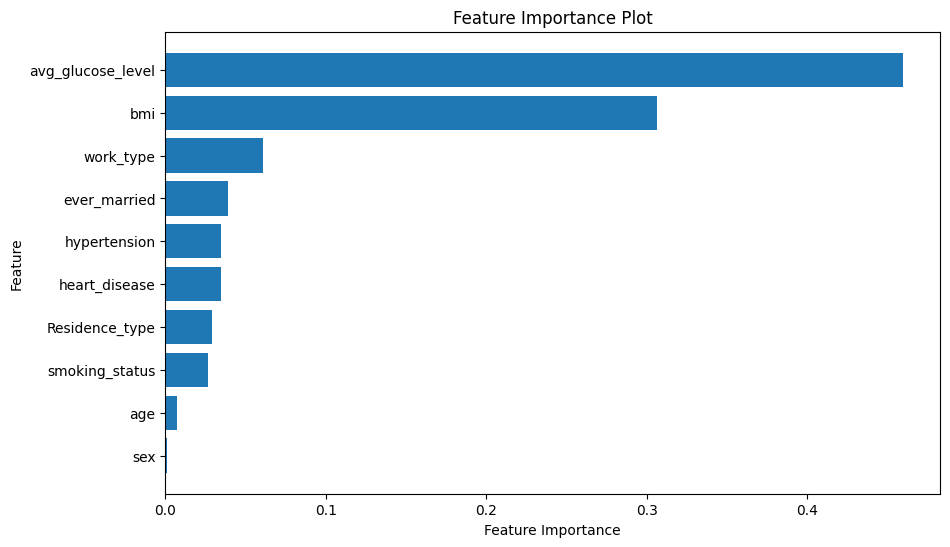

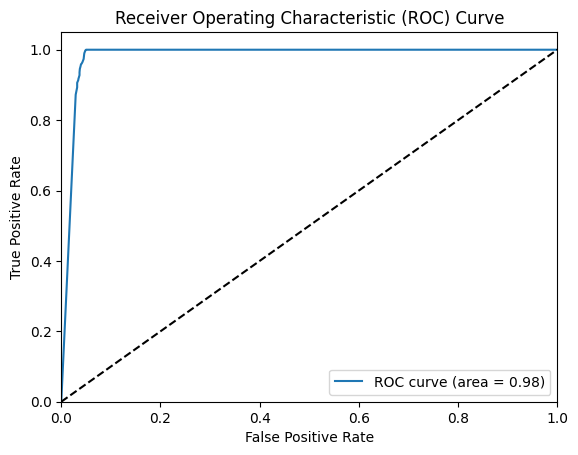

AUC Score: 0.982490341765253
Accuracy for each fold: [0.959404600811908, 0.9553450608930988, 0.9499323410013532, 0.9377537212449256, 0.9702300405953992, 0.9485791610284168, 0.959404600811908, 0.959349593495935, 0.9715447154471545, 0.9349593495934959]
Mean accuracy: 0.9546503184923594


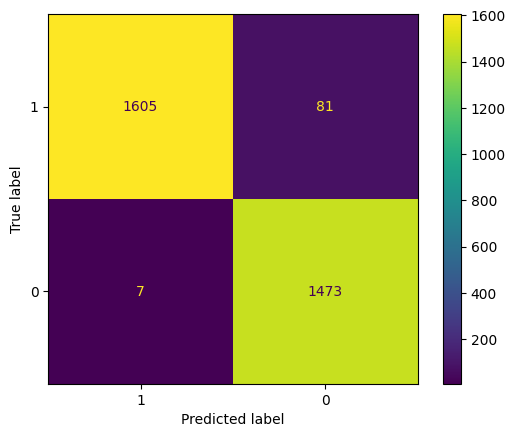

In [6]:
decision_tree = ML_algorithms.train_decision_tree_model(df)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)

### HistGradientBoosting

Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 45.677748680114746
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'max_iter': 367, 'min_samples_leaf': 18}
Best score on training data:  1.0
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3864
           1       1.00      1.00      1.00      3523

    accuracy                           1.00      7387
   macro avg       1.00      1.00      1.00      7387
weighted avg       1.00      1.00      1.00      7387

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1686
           1       0.99      1.00      0.99      1480

    accuracy                           0.99      3166
   macro avg       0.99      0.99      0.99      3166
weighted avg       0.99      0.99      0.99      3166



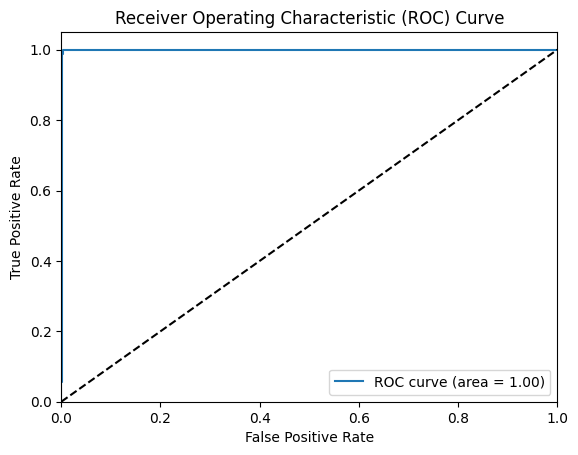

AUC Score: 0.998783703632458


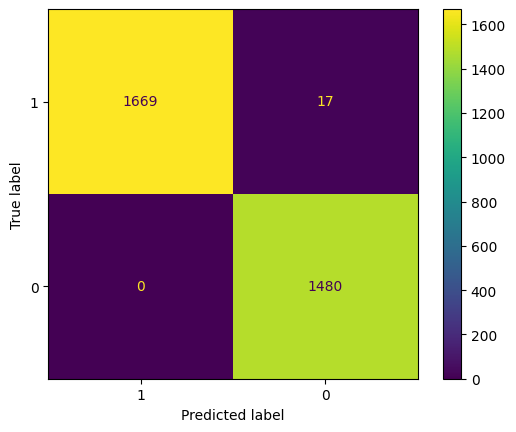

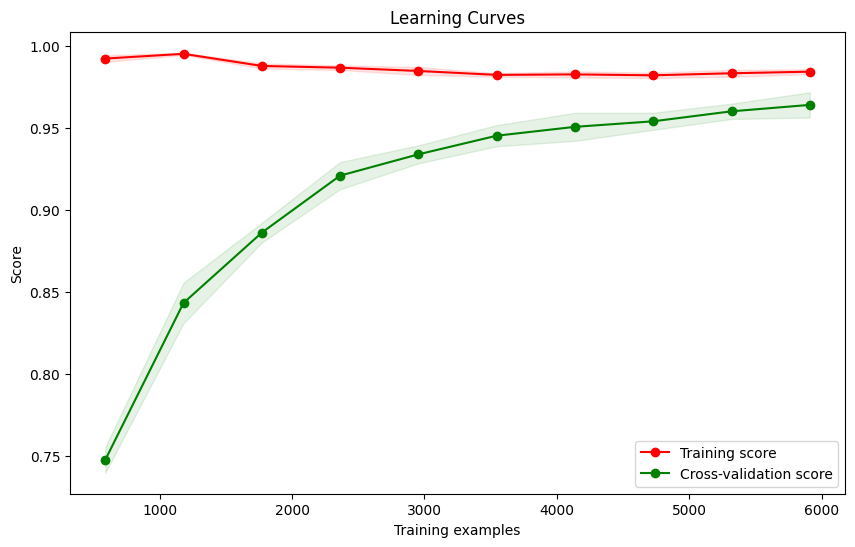

Accuracy for each fold: [0.9905277401894452, 0.986468200270636, 0.9878213802435724, 0.9851150202976996, 0.9918809201623816, 0.9851150202976996, 0.9905277401894452, 0.9932249322493225, 0.986449864498645, 0.9878048780487805]
Mean accuracy: 0.9884935696447628


In [7]:
hgb = ML_algorithms.train_hist_gradient_boosting_model(df)
ML_algorithms.k_fold_cross_validation_dt(hgb,df)